Code taken from https://github.com/gemmadanks/technosignatures/tree/main

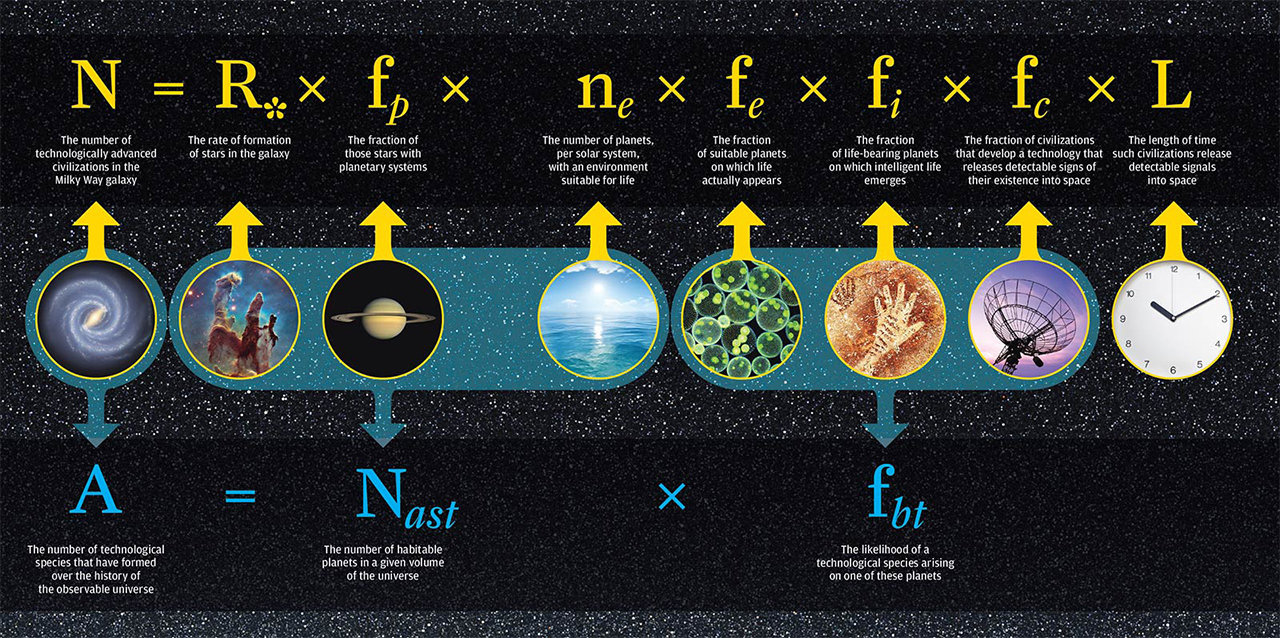

Credit: University of Rochester. ( https://exoplanets.nasa.gov/news/1350/are-we-alone-in-the-universe-revisiting-the-drake-equation/ )

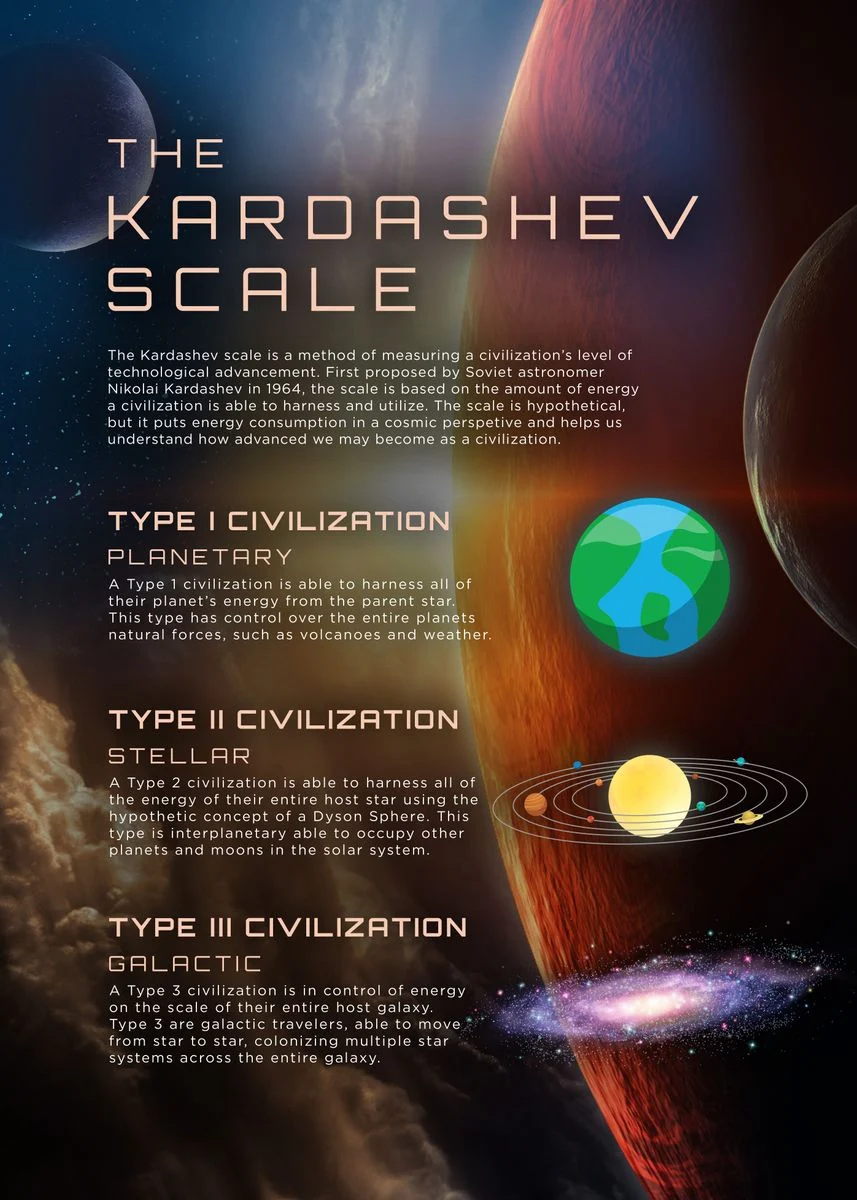

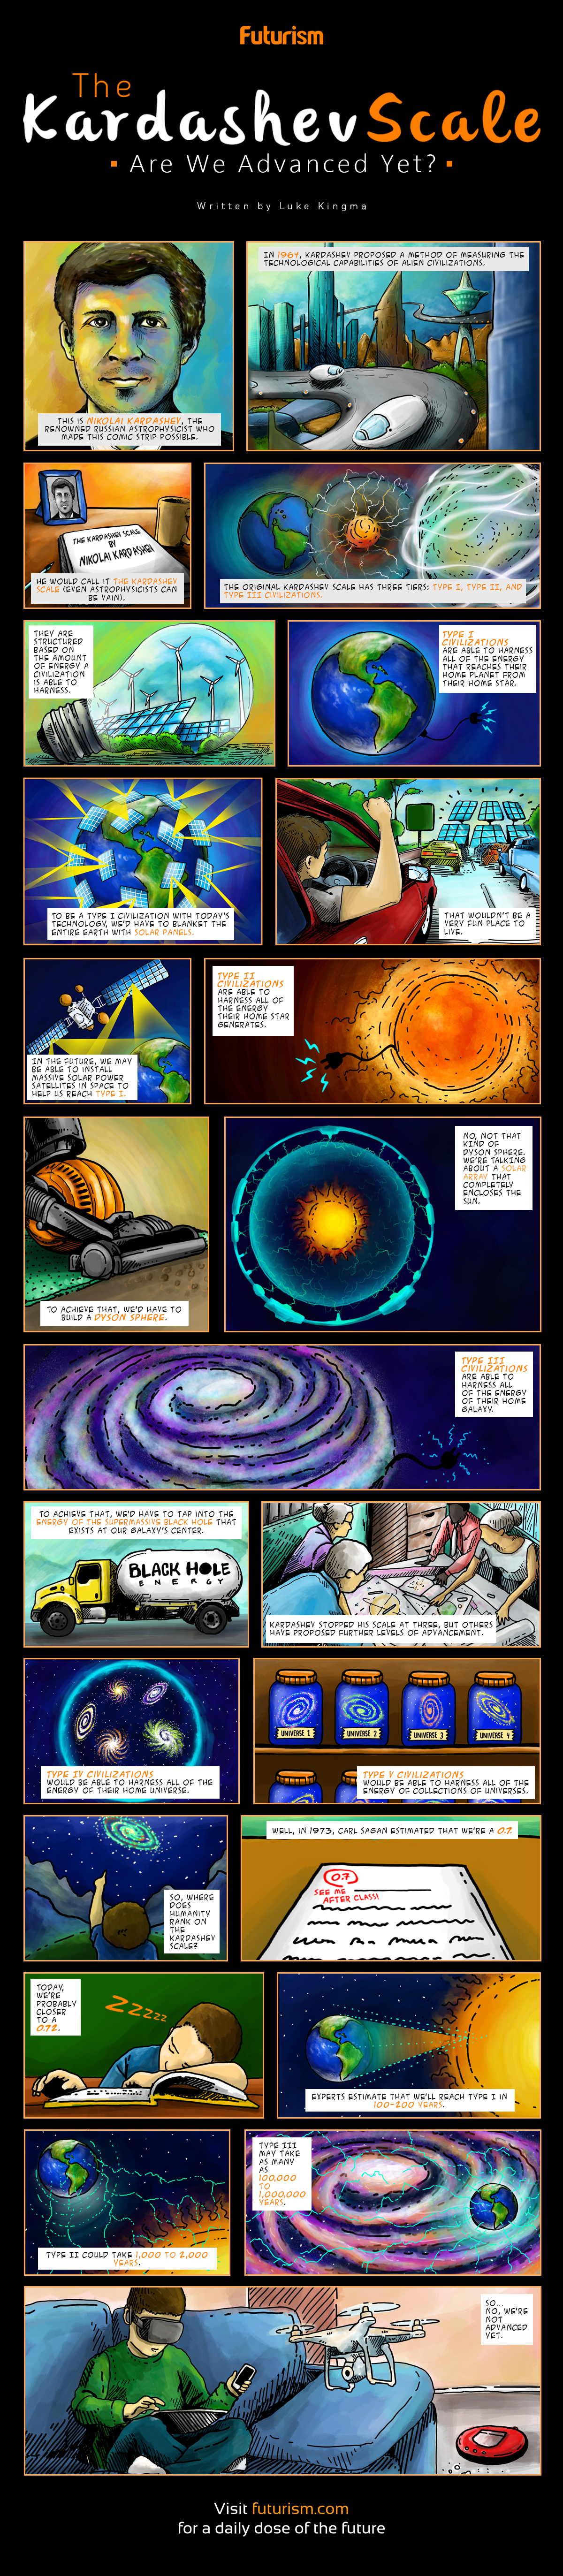

# Calculating minimum frequency for SETI

This notebook accompanies a post I wrote on [my open research site](https://open-research.gemmadanks.com/) with [my notes on one of the first papers on the search for extraterrestrial intelligence (SETI)](https://open-research.gemmadanks.com/research/search-for-interstellar-communications):

G. Cocconi and P. Morrison, "Searching for Interstellar Communications", *Nature*, vol. 184, pp. 844–846, 1959.

# Formulae from Cocconi & Morrison, 1959
For a star like the quiet sun, Cocconi & Morrison calculated the minimum frequency required for a signal to be detected above background from:

$$ f_{min} \approx 10^4 \left( { R \over l_d } \right) ^{0.4} Hz$$

Where $l_d$ is the diameter of the detector's mirror and R is the distance to the star in metres.

The authors derived this formula by equating two equations for spectral irradiance ($Wm^{-2}Hz^{-1}$) of:

1. The host star at a distance $R$:

$$ 10^{-15}f^2/R^2 $$  

2. The (isotropic part of the) galactic background:

$$ \left(10^{-12.5}\over f\right)\left(\lambda\over l_{d}\right)^2 $$

Substituting $c \over f$ = $3 x 10^8 \over f$ for $\lambda$ and solving for $f$ gives:

$$ 10^{-15}{f^2 \over R^2} = \left(10^{-12.5}\over f\right)\left(3\times10^8 \over f.l_{d}\right)^2 $$

$$ {{f^2 \over R^2}} = {{2.846 \times 10^{19}}\over {f^3 . {l_{d}}^2}} $$

$$ {f^5} = {{2.846 \times 10^{19}.R^2}\over {{l_{d}}^2}} $$

$$ {f} = { 7777 { \left( {R} \over { l_{d} } \right) }^{2/5}} $$

$$ {f} \approx { 10^4 { \left( {R} \over { l_{d} } \right) }^{0.4}} $$

## This notebook

I wanted to know what happens to this minimum frequency for stars of other spectral types. This means substituting the luminosity of other stellar classes (different temperature and radii) for $10^{-15}$ in the first equation above.

Since Cocconi & Morrison did not say where their formulae above come from, I had to do some investigation which led me to Planck's and subsequently Rayleigh-Jeans' laws of blackbody radiation, which can be used to model the radiation from a star at different frequencies.

## Planck's law of blackbody radiation

Planck's law gives the spectral radiance, $B_f$, (also called specific intensity) of energy emitted per second per unit area, per solid angle from a blackbody as a function of temperature and frequency. It is measured in $Wm^{−2}sr^{−1}Hz^{−1}$ (watts per square metre per steradian per hertz):

$$ {B_f\left(T\right)} = { {{2hf^3}\over{c^2}}{{1}\over{e^{hf\over\left(k_BT\right)} - 1}} }  $$

A steradian is a unit of solid angle (one steradian projects onto a sphere an area of $r^2$ and a sphere comprises $4\pi$ steradians since the surface area of a sphere is $4\pi r^2$). 

If we integrate over all solid angles (multiply by $\pi$) and over the whole surface area of a star (multiply by $4\pi r^2$) we get the monochromatic luminosity (luminosity per unit wavelength or frequency), $L_f$,  measured in $WHz^{−1}$ for the whole star:

$$ {L_f df} = { {{8\pi^2 r^2 hf^3}\over{c^2}}{{1}\over{e^{hf\over\left(k_BT\right)} - 1}} }  $$

To get the flux, $F$, ($Wm^{-2}$) passing through a detector at a distance away from the star, $R$, we divide the luminosity by the area of the sphere at $R$ ($4\pi R^2$):

$$ {F_f} = { {{8\pi^2 r^2 hf^3}\over{4\pi R^2c^2}}{{1}\over{e^{hf\over\left(k_BT\right)} - 1}} }  $$

$$ {                    } = { {{2\pi r^2 hf^3}\over{R^2c^2}}{{1}\over{e^{hf\over\left(k_BT\right)} - 1}} }  $$

## Rayleigh-Jeans' law of blackbody radiation

For low frequencies, we can also use the simpler Rayleigh-Jeans law:

$$ {B_f\left(T\right)} = { {{2f^2k_BT}\over{c^2}} }  $$

Integrated over all solid angles and surface area, for a star at a distance R we get the flux, $F_f$:

$$ {F_f} = { {{2\pi r^2f^2k_BT}\over{R^2c^2}} }  $$


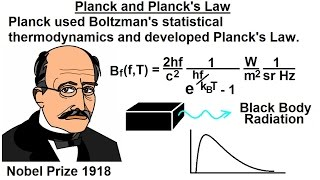

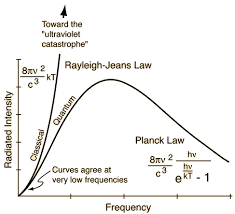

Credits: http://hyperphysics.phy-astr.gsu.edu/hbase/mod6.html

## Import dependencies

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from blackbody import (                ##This is the blackbody.py """Quantifying radiation from a blackbody."""
                       spectral_radiance_planck,
                       spectral_radiance_rayleigh_jeans,
                       monochromatic_luminosity_planck,
                       monochromatic_luminosity_rayleigh_jeans,
                       flux_from_luminosity,
                      )
from constants import (                                           #Constants.py """Physical constants."""
                       BOLTZMANN,
                       LIGHT_SPEED,
                       SUN_TEMP,
                       SUN_RADIUS,
                       AU
)
from cocconi_morrison import (                                     #cocconi-morison.py
                              luminosity_sunlike,
                              flux_sunlike,
                              flux_from_galaxy,
                              frequency_minimum
                             )
from utils import light_years_to_metres

%matplotlib inline

In [2]:
import blackbody
#help(blackbody)  #This is the blackbody.py code

In [3]:
#checking module
import cocconi_morrison
#help(cocconi_morrison)

In [4]:
%load_ext autoreload
%autoreload 2

## Radiation from the Sun

Use a range of frequencies from 1 Hz to 100 billion THz in log-space to compute various metrics of radiation.

- Planck's law of blackbody radiation (models the Sun as a blackbody with a surface temperature of 5778 K)
- Rayleigh-Jeans law (applies for low frequencies) (models the Sun as a blackbody with a surface temperature of 5778 K)
- Formula from Cocconi & Morrison, 1959 (models the quiet Sun, accounting for deviations from a perfect blackbody)

In [5]:
frequencies = np.logspace(1, 20, 10000) #100 billion THz = 100x10*9x10*12 = 10*23 
# 10000 here is the Number of samples to generate and not steps. 
#Return numbers spaced evenly on a log scale.

In [6]:
#added later
#print(len(frequencies))
#print(frequencies[0])
#print(frequencies[1])
#print(frequencies[2])

In [7]:
#added later
#plt.plot(frequencies)
#plt.yscale('log')

In [8]:
# added later to see the evenly soaced data
# for i in range(len(frequencies)):
#    diff1=np.log10(frequencies[i+1])-(np.log10(frequencies[i]))
#    print(diff1)

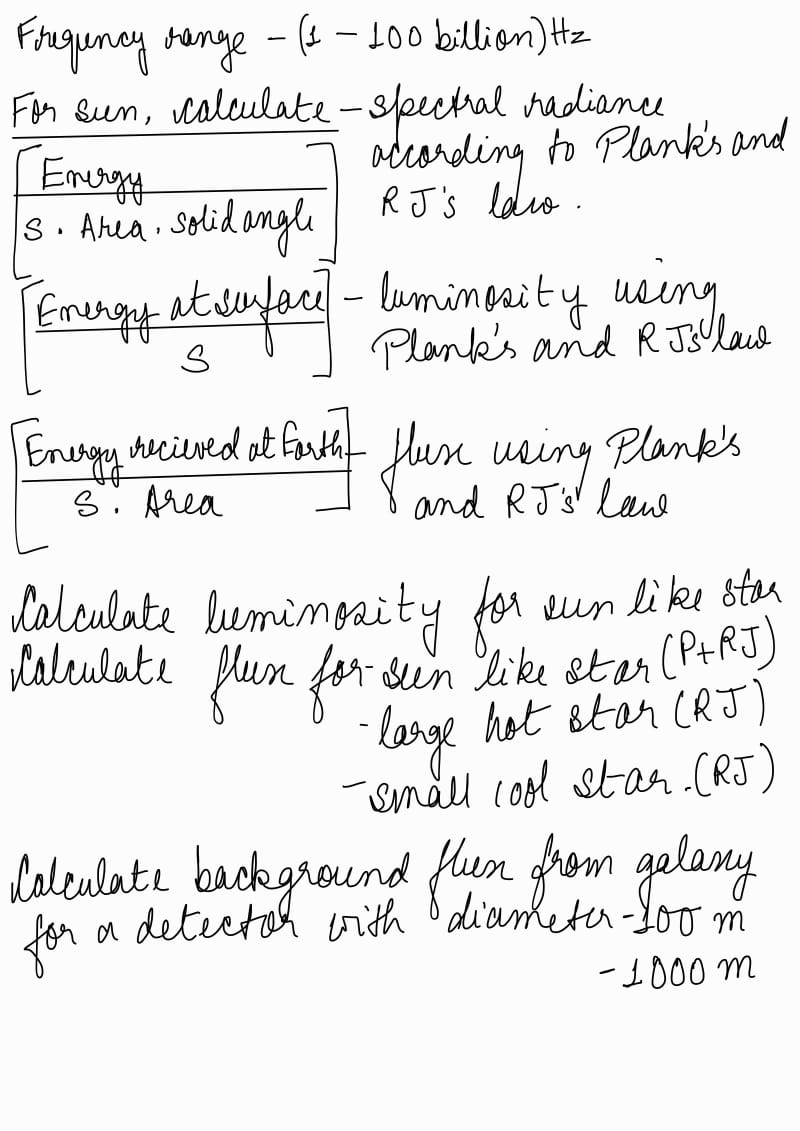

#### Spectral radiance

Energy per second per unit area per solid angle.

In [9]:
sun_spectral_radiance_planck = [spectral_radiance_planck(freq, SUN_TEMP) for freq in frequencies]
sun_spectral_radiance_rj = [spectral_radiance_rayleigh_jeans(freq, SUN_TEMP) for freq in frequencies]


#Computes sun's spectral radiance using Plank and RJ law using the frequency and sun temperatures

/home/sagarika/belgrade/astrobio/technosignatures/radio-seti/interstellar-communications/blackbody.py:34: RuntimeWarning: overflow encountered in exp
  * (1 / (np.exp((PLANCK * frequency) / (BOLTZMANN * temperature))


In [10]:
type(sun_spectral_radiance_planck)

list

(1e-23, 0.001)

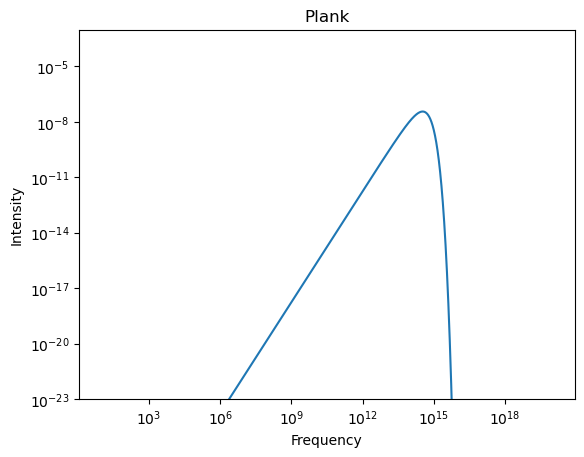

In [11]:
#added later
plt.plot(frequencies,sun_spectral_radiance_planck)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.title('Plank')
#set_aspect('auto')
#set_ylim([10e-24, 10e-4])
plt.ylim(ymin=10e-24, ymax=10e-4)

Text(0.5, 1.0, 'RJ')

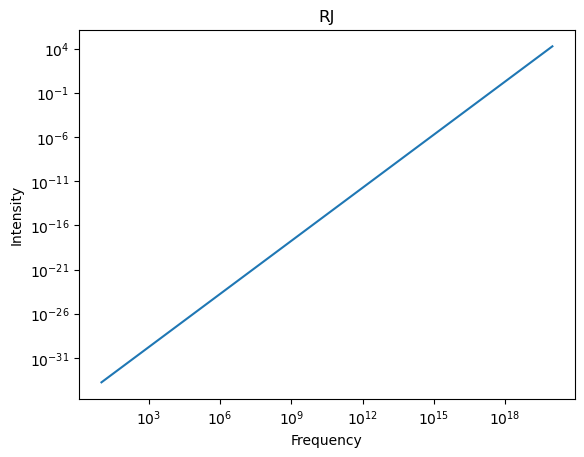

In [12]:
plt.plot(frequencies,sun_spectral_radiance_rj)
plt.yscale('log')
plt.xscale('log')
#plt.ylim=[(1e-24, 1e-4)]
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.title('RJ')
#set_aspect('auto')
#set_ylim([10e-24, 10e-4])

#plt.ylim(ymin=10e-24, ymax=10e-4)

#### Monochromatic luminosity

Total energy emitted at the surface of the Sun per second per Hz.

In [13]:
sun_luminosity_rj = [monochromatic_luminosity_rayleigh_jeans(freq, SUN_TEMP, SUN_RADIUS)
                       for freq in frequencies]
#  Compute frequency dependent luminosity of a star based on RJ's law.


sun_luminosity_planck = [monochromatic_luminosity_planck(freq, SUN_TEMP, SUN_RADIUS)
                   for freq in frequencies]

#  Compute frequency dependent luminosity of a star based on Plank's law.

sunlike_luminosity = [luminosity_sunlike(freq) for freq in frequencies]

# Compute luminosity at given frequency from sun-like star (Cocconi & Morrison 1959)

#### Flux

Energy received per second per unit area at Earth distance.

In [14]:
sun_flux_planck = [flux_from_luminosity(monochromatic_luminosity_planck(freq, SUN_TEMP, SUN_RADIUS),
                                        AU)
                   for freq in frequencies]

# flux_from_luminosity-Compute total flux from luminosity of a star.
# Here we are getting flux from luminosity. The luminosity is the monochromatic luminosity
# based on plank's law. 
# This is done for Sun, with sun's temp and radius.


sun_flux_rj = [flux_from_luminosity(monochromatic_luminosity_rayleigh_jeans(freq, SUN_TEMP, SUN_RADIUS),
                                    AU)
               for freq in frequencies]

# Here we are getting flux from luminosity. The luminosity is the monochromatic luminosity
# based on RJ's law.
# This is done for Sun, with sun's temp and radius.


large_hot_star_flux_rj = [flux_from_luminosity(monochromatic_luminosity_rayleigh_jeans(freq, SUN_TEMP*2, SUN_RADIUS*100),
                                    AU)
               for freq in frequencies]

# Here we are getting flux from luminosity. The luminosity is the monochromatic luminosity
# based on RJ's law.
# This is done for large and hot star, with 2*(sun's temp) and 100*radius.


small_cool_star_flux_rj = [flux_from_luminosity(monochromatic_luminosity_rayleigh_jeans(freq, SUN_TEMP/2, SUN_RADIUS*0.01),
                                    AU)
               for freq in frequencies]

# Here we are getting flux from luminosity. The luminosity is the monochromatic luminosity
# based on RJ's law.
# This is done for small and cool star, with 0.5*(sun's temp) and 0.01*radius.

# Check the reason for ration of radius and temperature. 


sunlike_flux = [flux_sunlike(freq, AU) for freq in frequencies]

# flux_sunlike : Compute flux at given frequency from sun-like star

In [15]:
#ADDED LATER

large_hot_star_flux_plank = [flux_from_luminosity(monochromatic_luminosity_planck(freq, SUN_TEMP*2, SUN_RADIUS*100),
                                    AU)
               for freq in frequencies]

# Here we are getting flux from luminosity. The luminosity is the monochromatic luminosity
# based on Plank's law.
# This is done for large and hot star, with 2*(sun's temp) and 100*radius.


small_cool_star_flux_plank = [flux_from_luminosity(monochromatic_luminosity_planck(freq, SUN_TEMP/2, SUN_RADIUS*0.01),
                                    AU)
               for freq in frequencies]

### Flux from galaxy

In [16]:
#Compute background flux at given frequency from the galaxy for detectors of different diameters.

galactic_flux_100 = [flux_from_galaxy(freq, diameter_mirror=100) for freq in frequencies]
galactic_flux_1000 = [flux_from_galaxy(freq, diameter_mirror=1000) for freq in frequencies]

### Compare curves

In [17]:
sun_df = pd.DataFrame({#"frequencies":frequencies,
                       "sun_spectral_radiance_planck": sun_spectral_radiance_planck,
                       "sun_spectral_radiance_rj": sun_spectral_radiance_rj,
                       "sunlike_luminosity": sunlike_luminosity,
                       "sun_luminosity_rayleigh_jeans": sun_luminosity_rj,
                       "sun_luminosity_planck": sun_luminosity_planck,
                       "sun_flux_planck": sun_flux_planck,
                       "sun_flux_rj": sun_flux_rj,
                       "large_hot_star_flux_rj": large_hot_star_flux_rj,
                       "small_cool_star_flux_rj": small_cool_star_flux_rj,
                       "sunlike_flux": sunlike_flux,
                       "galactic_flux_100": galactic_flux_100,
                       "galactic_flux_1000": galactic_flux_1000,
                       "large_hot_star_flux_planck": large_hot_star_flux_plank,
                       "small_cool_star_flux_planck": small_cool_star_flux_plank})
sun_df.index = frequencies

In [18]:
sun_df.head()

sun_spectral_radiance_planck  sun_spectral_radiance_rj  \
10.000000                  1.775550e-34              1.774901e-34   
10.043849                  1.789440e-34              1.790501e-34   
10.087891                  1.808274e-34              1.806238e-34   
10.132126                  1.822497e-34              1.822113e-34   
10.176554                  1.836884e-34              1.838128e-34   

           sunlike_luminosity  sun_luminosity_rayleigh_jeans  \
10.000000        1.256637e-12                   3.391392e-15   
10.043849        1.267682e-12                   3.421199e-15   
10.087891        1.278824e-12                   3.451268e-15   
10.132126        1.290063e-12                   3.481602e-15   
10.176554        1.301402e-12                   3.512202e-15   

           sun_luminosity_planck  sun_flux_planck   sun_flux_rj  \
10.000000           3.392630e-15     1.206357e-38  1.205917e-38   
10.043849           3.419171e-15     1.215794e-38  1.216516e-38   
10.087891           3.455158e-15     1.228591e-38  1.227208e-38   
10.132126           3.482336e-15     1.238255e-38  1.237994e-38   
10.176554           3.509825e-15     1.248029e-38  1.248875e-38   

           large_hot_star_flux_rj  small_cool_star_flux_rj  sunlike_flux  \
10.000000            2.411833e-34             6.029583e-43  5.615120e-35   
10.043849            2.433031e-34             6.082578e-43  5.664472e-35   
10.087891            2.454415e-34             6.136038e-43  5.714257e-35   
10.132126            2.475987e-34             6.189969e-43  5.764481e-35   
10.176554            2.497749e-34             6.244373e-43  5.815145e-35   

           galactic_flux_100  galactic_flux_1000  large_hot_star_flux_planck  \
10.000000           0.002842            0.000028                2.412714e-34   
10.043849           0.002805            0.000028                2.431589e-34   
10.087891           0.002768            0.000028                2.450681e-34   
10.132126           0.002732            0.000027                2.469992e-34   
10.176554           0.002697            0.000027                2.502627e-34   

           small_cool_star_flux_planck  
10.000000                 6.031785e-43  
10.043849                 6.078972e-43  
10.087891                 6.134817e-43  
10.132126                 6.191273e-43  
10.176554                 6.248346e-43

#### Spectral radiance

Rayleigh-Jeans law does not fit at higher frequences, as expected.

Text(0, 0.5, 'Spectral Radiance')

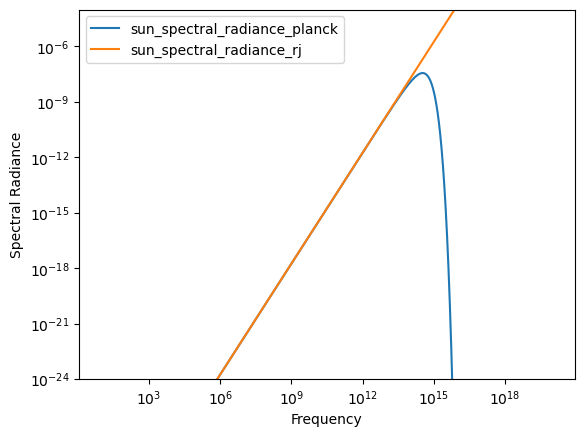

In [19]:
sun_df[["sun_spectral_radiance_planck", "sun_spectral_radiance_rj"]][0:1e20].plot(use_index=True, logx=True, logy=True, ylim=(1e-24, 1e-4))
plt.xlabel('Frequency')
plt.ylabel('Spectral Radiance')
#plt.title('RJ')

### Monochromatic luminosity

Text(0, 0.5, 'Monochromatic Luminosity')

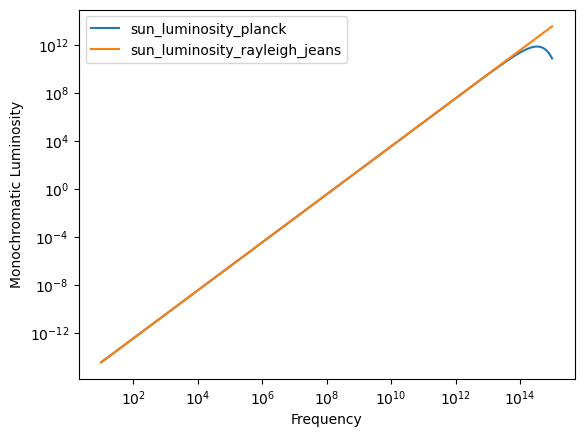

In [20]:
sun_df[["sun_luminosity_planck", "sun_luminosity_rayleigh_jeans"]][0:1e15].plot(use_index=True, logx=True, logy=True)
plt.xlabel('Frequency')
plt.ylabel('Monochromatic Luminosity')


### Flux

Flux for a star computed using formula from Cocconi & Morrison follows the same slope as Rayleigh-Jeans law but values are higher. 

The flux for the galactic background radiation has the inverse relationship to frequency. There is a point where the flux from a star equals the flux from galactic background. This gives the minimum frequency for transmission of interstellar communications since any frequency below this will be indistinguishable from the galactic background. The minimum frequency varies according to the temperature and radius of a star. 

- Hotter and larger stars have lower minimum frequencies (with higher flux)
- Smaller and cooler stars have higher minimum frequencies (with lower flux)

Text(0, 0.5, 'Flux')

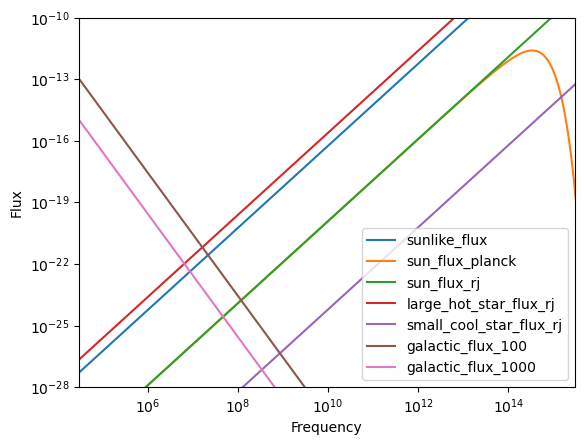

In [21]:
sun_df[["sunlike_flux", "sun_flux_planck",
        "sun_flux_rj", "large_hot_star_flux_rj",
        "small_cool_star_flux_rj",
        "galactic_flux_100", "galactic_flux_1000"]][1e-2:1e18].plot(use_index=True, logx=True, logy=True, ylim=(1e-28, 1e-10), xlim=(3e4, 3e15))
plt.xlabel('Frequency')
plt.ylabel('Flux')

### I also calculated flux of large hot star and small cool star using Plank's law

<Axes: >

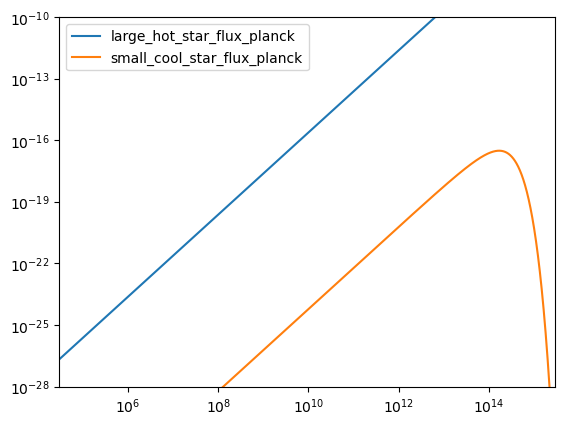

In [22]:
sun_df[["large_hot_star_flux_planck","small_cool_star_flux_planck"]][1e-2:1e18].plot(use_index=True, logx=True, logy=True, ylim=(1e-28, 1e-10), xlim=(3e4, 3e15))

### Plotting them all together

Text(0, 0.5, 'Flux')

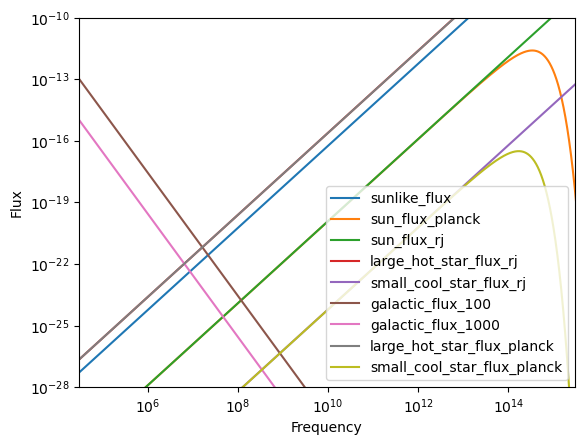

In [23]:
sun_df[["sunlike_flux", "sun_flux_planck",
        "sun_flux_rj", "large_hot_star_flux_rj",
        "small_cool_star_flux_rj",
        "galactic_flux_100", "galactic_flux_1000","large_hot_star_flux_planck","small_cool_star_flux_planck"]][1e-2:1e18].plot(use_index=True, logx=True, logy=True, ylim=(1e-28, 1e-10), xlim=(3e4, 3e15))
plt.xlabel('Frequency')
plt.ylabel('Flux')

In [24]:
sun_df

sun_spectral_radiance_planck  sun_spectral_radiance_rj  \
1.000000e+01                  1.775550e-34              1.774901e-34   
1.004385e+01                  1.789440e-34              1.790501e-34   
1.008789e+01                  1.808274e-34              1.806238e-34   
1.013213e+01                  1.822497e-34              1.822113e-34   
1.017655e+01                  1.836884e-34              1.838128e-34   
...                                    ...                       ...   
9.826509e+19                  0.000000e+00              1.713850e+04   
9.869597e+19                  0.000000e+00              1.728913e+04   
9.912875e+19                  0.000000e+00              1.744108e+04   
9.956342e+19                  0.000000e+00              1.759438e+04   
1.000000e+20                  0.000000e+00              1.774901e+04   

              sunlike_luminosity  sun_luminosity_rayleigh_jeans  \
1.000000e+01        1.256637e-12                   3.391392e-15   
1.004385e+01        1.267682e-12                   3.421199e-15   
1.008789e+01        1.278824e-12                   3.451268e-15   
1.013213e+01        1.290063e-12                   3.481602e-15   
1.017655e+01        1.301402e-12                   3.512202e-15   
...                          ...                            ...   
9.826509e+19        1.213412e+26                   3.274737e+23   
9.869597e+19        1.224077e+26                   3.303519e+23   
9.912875e+19        1.234835e+26                   3.332554e+23   
9.956342e+19        1.245689e+26                   3.361844e+23   
1.000000e+20        1.256637e+26                   3.391392e+23   

              sun_luminosity_planck  sun_flux_planck   sun_flux_rj  \
1.000000e+01           3.392630e-15     1.206357e-38  1.205917e-38   
1.004385e+01           3.419171e-15     1.215794e-38  1.216516e-38   
1.008789e+01           3.455158e-15     1.228591e-38  1.227208e-38   
1.013213e+01           3.482336e-15     1.238255e-38  1.237994e-38   
1.017655e+01           3.509825e-15     1.248029e-38  1.248875e-38   
...                             ...              ...           ...   
9.826509e+19           0.000000e+00     0.000000e+00  1.164436e+00   
9.869597e+19           0.000000e+00     0.000000e+00  1.174671e+00   
9.912875e+19           0.000000e+00     0.000000e+00  1.184995e+00   
9.956342e+19           0.000000e+00     0.000000e+00  1.195410e+00   
1.000000e+20           0.000000e+00     0.000000e+00  1.205917e+00   

              large_hot_star_flux_rj  small_cool_star_flux_rj  sunlike_flux  \
1.000000e+01            2.411833e-34             6.029583e-43  5.615120e-35   
1.004385e+01            2.433031e-34             6.082578e-43  5.664472e-35   
1.008789e+01            2.454415e-34             6.136038e-43  5.714257e-35   
1.013213e+01            2.475987e-34             6.189969e-43  5.764481e-35   
1.017655e+01            2.497749e-34             6.244373e-43  5.815145e-35   
...                              ...                      ...           ...   
9.826509e+19            2.328873e+04             5.822182e-05  5.421975e+03   
9.869597e+19            2.349342e+04             5.873354e-05  5.469629e+03   
9.912875e+19            2.369990e+04             5.924975e-05  5.517702e+03   
9.956342e+19            2.390820e+04             5.977050e-05  5.566198e+03   
1.000000e+20            2.411833e+04             6.029583e-05  5.615120e+03   

              galactic_flux_100  galactic_flux_1000  \
1.000000e+01       2.842113e-03        2.842113e-05   
1.004385e+01       2.805051e-03        2.805051e-05   
1.008789e+01       2.768473e-03        2.768473e-05   
1.013213e+01       2.732371e-03        2.732371e-05   
1.017655e+01       2.696740e-03        2.696740e-05   
...                         ...                 ...   
9.826509e+19       2.995323e-60        2.995323e-62   
9.869597e+19       2.956263e-60        2.956263e-62   
9.912875e+19       2.917713e-60        2.917713e-62   
9.95

In [25]:
#Large hot star RJ overlaps with large hot star planck

### Difference between Rayleigh-Jeans and Cocconi-Morrison

The flux is ~370 times higher using Cocconi & Morrison's formula.

If using the Rayleigh-Jeans law the formula would be:

$$ 2.6987 \times 10^{-18}f^2/R^2 $$  

The Cocconi & Morrison's formula is:

$$ 10^{-15}f^2/R^2 $$  

In their paper Cocconi & Morrison state their formula is based on the 'quiet Sun', not a blackbody. The Sun deviates from a blackbody at lower frequencies: there is a higher radiance that creates a bulge in the curve at approximately this order of magnitude.

### Varying star types
To compute the proportionality factor for minimum frequency for different star types in the formula we use:
$$ \left({c^4 10^{-12.5}}\over{2\pi k_B r^2T}\right)^{0.2} $$

$$ 5\times 10^8\over{\left({r^2T}\right)^{0.2}} $$

Where r is the radius of the star and T is the temperature of the star. The higher the temperature or the larger the radius, the lower the minimum frequency.


## Rayleigh-Jeans' law of blackbody radiation

For low frequencies, we can also use the simpler Rayleigh-Jeans law:

$$ {B_f\left(T\right)} = { {{2f^2k_BT}\over{c^2}} }  $$

Integrated over all solid angles and surface area, for a star at a distance R we get the flux, $F_f$:

$$ {F_f} = { {{2\pi r^2f^2k_BT}\over{R^2c^2}} }  $$

In [26]:
def constant_for_flux_calc(solar_radii, temperature):
    """Constant used to compute flux from Rayleigh-Jeans law given temperature and radius of a star.
    
    Used to multiply f^2/R^2 (where is frequency and R is distance to a star)
    
    Args:
        solar_radii: radius of star (solar radii)
        temperature: temperature of star (Kelvin)
    Returns:
        Factor used to calculate flux
    """
    return (2 * math.pi * pow(solar_radii * SUN_RADIUS, 2) * BOLTZMANN * temperature) / pow(LIGHT_SPEED, 2) 
# rayeigh jeans formula for Integrated over all solid angles and surface area, for a star at a distance R 
# we get the flux, 𝐹𝑓. See formula at the begining of the codes. 

In [27]:
constant_for_flux_calc(1, SUN_TEMP) # for solar radius, i.e for sun

2.6987839546541377e-18

In [28]:
constant_cocconi_morrison = 1e-15
quiet_sun_factor = constant_cocconi_morrison / constant_for_flux_calc(1, SUN_TEMP)
#quiet_sun_factor = 1
quiet_sun_factor

370.5372555944942

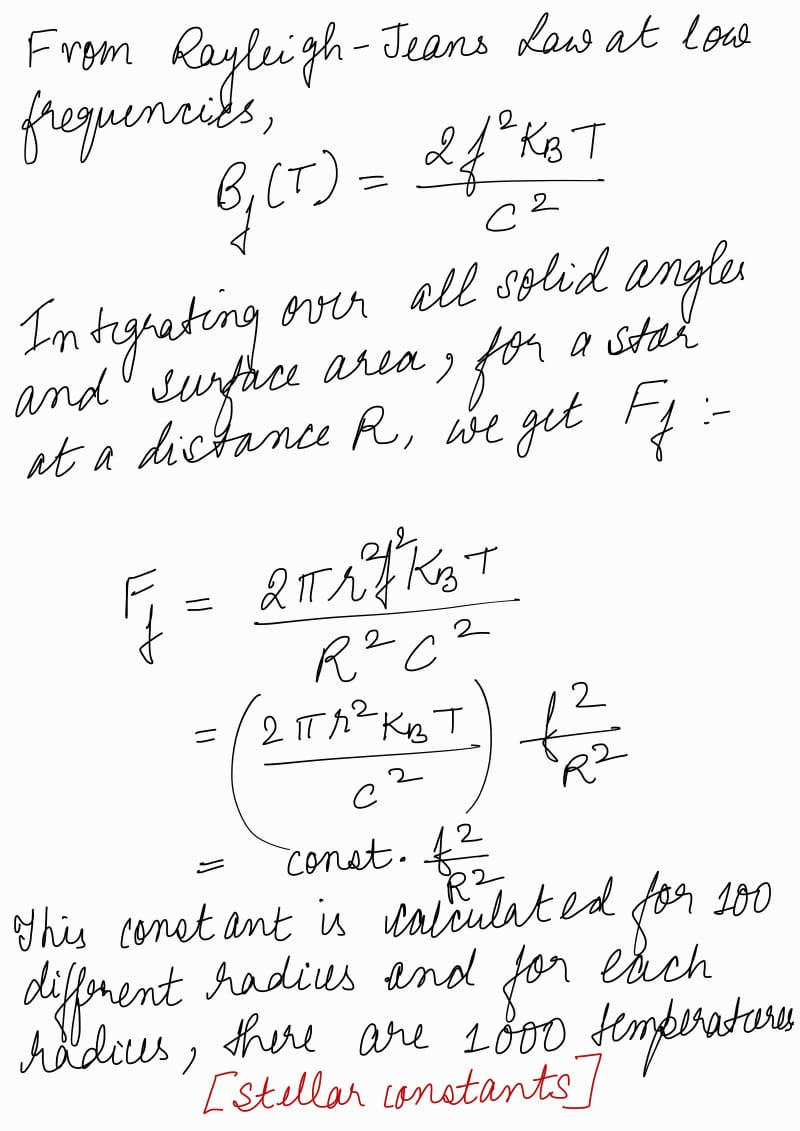

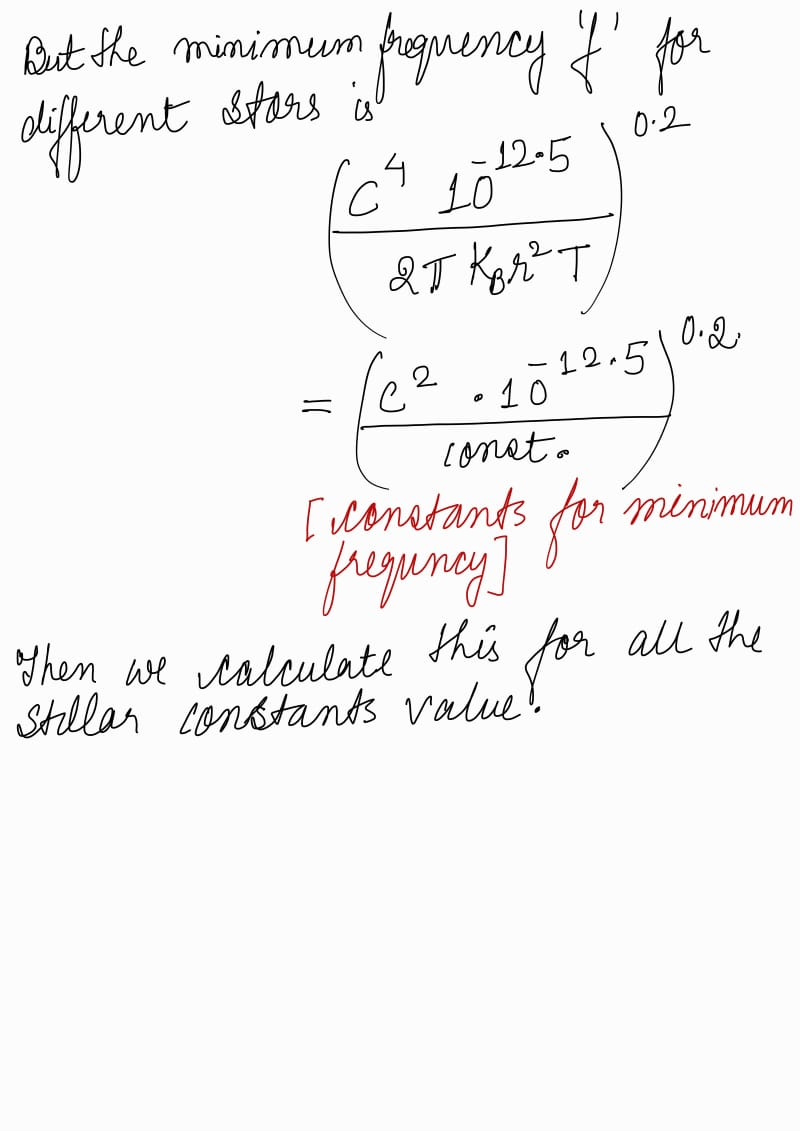

### Constant for different types of stars
Vary the radius and temperature

In [29]:
#radii = np.logspace(-2, np.log10(2000), 100) # log10 solar radii
#temperatures = np.linspace(2000, 50000, 1000)

radii = np.logspace(-2, np.log10(1000), 100) # log10 solar radii
temperatures = np.linspace(3000, 50000, 1000)

stellar_constants = pd.DataFrame(constant_for_flux_calc(radii[:, None], 
                                                        temperatures) * quiet_sun_factor,
                                 index = np.around(radii, 2),        # radii rounded off
                                 columns=np.around(temperatures,0))  # temperatures rounded off

In [30]:
#added later
radii
#the starting value is 0.01, the ending value is 1000, and the number of values is 100. 
#The resulting array radii contains 100 logarithmically spaced values between 0.01 and 2000.

array([1.00000000e-02, 1.12332403e-02, 1.26185688e-02, 1.41747416e-02,
       1.59228279e-02, 1.78864953e-02, 2.00923300e-02, 2.25701972e-02,
       2.53536449e-02, 2.84803587e-02, 3.19926714e-02, 3.59381366e-02,
       4.03701726e-02, 4.53487851e-02, 5.09413801e-02, 5.72236766e-02,
       6.42807312e-02, 7.22080902e-02, 8.11130831e-02, 9.11162756e-02,
       1.02353102e-01, 1.14975700e-01, 1.29154967e-01, 1.45082878e-01,
       1.62975083e-01, 1.83073828e-01, 2.05651231e-01, 2.31012970e-01,
       2.59502421e-01, 2.91505306e-01, 3.27454916e-01, 3.67837977e-01,
       4.13201240e-01, 4.64158883e-01, 5.21400829e-01, 5.85702082e-01,
       6.57933225e-01, 7.39072203e-01, 8.30217568e-01, 9.32603347e-01,
       1.04761575e+00, 1.17681195e+00, 1.32194115e+00, 1.48496826e+00,
       1.66810054e+00, 1.87381742e+00, 2.10490414e+00, 2.36448941e+00,
       2.65608778e+00, 2.98364724e+00, 3.35160265e+00, 3.76493581e+00,
       4.22924287e+00, 4.75081016e+00, 5.33669923e+00, 5.99484250e+00,
      

In [31]:
#added later
temperatures
# The starting value is 3000, the ending value is 50000, and the number of values is 1000. 
# The resulting array temperatures contains 1000 linearly spaced values between 2000 and 50000.

array([ 3000.        ,  3047.04704705,  3094.09409409,  3141.14114114,
        3188.18818819,  3235.23523524,  3282.28228228,  3329.32932933,
        3376.37637638,  3423.42342342,  3470.47047047,  3517.51751752,
        3564.56456456,  3611.61161161,  3658.65865866,  3705.70570571,
        3752.75275275,  3799.7997998 ,  3846.84684685,  3893.89389389,
        3940.94094094,  3987.98798799,  4035.03503504,  4082.08208208,
        4129.12912913,  4176.17617618,  4223.22322322,  4270.27027027,
        4317.31731732,  4364.36436436,  4411.41141141,  4458.45845846,
        4505.50550551,  4552.55255255,  4599.5995996 ,  4646.64664665,
        4693.69369369,  4740.74074074,  4787.78778779,  4834.83483483,
        4881.88188188,  4928.92892893,  4975.97597598,  5023.02302302,
        5070.07007007,  5117.11711712,  5164.16416416,  5211.21121121,
        5258.25825826,  5305.30530531,  5352.35235235,  5399.3993994 ,
        5446.44644645,  5493.49349349,  5540.54054054,  5587.58758759,
      

In [32]:
#added later
len(radii[:, None])

100

In [33]:
#added later
len((constant_for_flux_calc(radii[:, None],temperatures)[0]))

1000

In [34]:
#added later
len(constant_for_flux_calc(radii[:, None],temperatures))

100

In [35]:
# added later
len(stellar_constants)

100

In [36]:
# added later
stellar_constants

# first column is the radii
#first row is the temperature
#and we can see the calculated constants for them

3000.0        3047.0        3094.0        3141.0        3188.0   \
0.01     5.193007e-20  5.274445e-20  5.355884e-20  5.437322e-20  5.518761e-20   
0.01     6.552831e-20  6.655595e-20  6.758359e-20  6.861123e-20  6.963886e-20   
0.01     8.268735e-20  8.398408e-20  8.528082e-20  8.657755e-20  8.787428e-20   
0.01     1.043396e-19  1.059759e-19  1.076122e-19  1.092485e-19  1.108848e-19   
0.02     1.316616e-19  1.337264e-19  1.357912e-19  1.378559e-19  1.399207e-19   
...               ...           ...           ...           ...           ...   
628.03   2.048229e-10  2.080350e-10  2.112471e-10  2.144592e-10  2.176713e-10   
705.48   2.584572e-10  2.625104e-10  2.665636e-10  2.706168e-10  2.746700e-10   
792.48   3.261360e-10  3.312505e-10  3.363651e-10  3.414797e-10  3.465943e-10   
890.22   4.115369e-10  4.179908e-10  4.244446e-10  4.308985e-10  4.373524e-10   
1000.00  5.193007e-10  5.274445e-10  5.355884e-10  5.437322e-10  5.518761e-10   

              3235.0        3282.0        3329.0        3376.0        3423.0   \
0.01     5.600199e-20  5.681638e-20  5.763077e-20  5.844515e-20  5.925954e-20   
0.01     7.066650e-20  7.169414e-20  7.272178e-20  7.374942e-20  7.477705e-20   
0.01     8.917101e-20  9.046774e-20  9.176448e-20  9.306121e-20  9.435794e-20   
0.01     1.125211e-19  1.141573e-19  1.157936e-19  1.174299e-19  1.190662e-19   
0.02     1.419855e-19  1.440502e-19  1.461150e-19  1.481798e-19  1.502445e-19   
...               ...           ...           ...           ...           ...   
628.03   2.208834e-10  2.240955e-10  2.273076e-10  2.305197e-10  2.337318e-10   
705.48   2.787232e-10  2.827765e-10  2.868297e-10  2.908829e-10  2.949361e-10   
792.48   3.517088e-10  3.568234e-10  3.619380e-10  3.670526e-10  3.721672e-10   
890.22   4.438062e-10  4.502601e-10  4.567140e-10  4.631678e-10  4.696217e-10   
1000.00  5.600199e-10  5.681638e-10  5.763077e-10  5.844515e-10  5.925954e-10   

         ...       49577.0       49624.0       49671.0       49718.0  \
0.01     ...  8.581717e-19  8.589860e-19  8.598004e-19  8.606148e-19   
0.01     ...  1.082890e-18  1.083917e-18  1.084945e-18  1.085973e-18   
0.01     ...  1.366452e-18  1.367749e-18  1.369045e-18  1.370342e-18   
0.01     ...  1.724267e-18  1.725903e-18  1.727539e-18  1.729176e-18   
0.02     ...  2.175778e-18  2.177843e-18  2.179907e-18  2.181972e-18   
...      ...           ...           ...           ...           ...   
628.03   ...  3.384806e-09  3.388018e-09  3.391230e-09  3.394442e-09   
705.48   ...  4.271141e-09  4.275194e-09  4.279247e-09  4.283300e-09   
792.48   ...  5.389568e-09  5.394683e-09  5.399797e-09  5.404912e-09   
890.22   ...  6.800864e-09  6.807317e-09  6.813771e-09  6.820225e-09   
1000.00  ...  8.581717e-09  8.589860e-09  8.598004e-09  8.606148e-09   

              49765.0       49812.0       49859.0       49906.0       49953.0  \
0.01     8.614292e-19  8.622436e-19  8.630580e-19  8.638724e-19  8.646867e-19   
0.01     1.087000e-18  1.088028e-18  1.089056e-18  1.090083e-18  1.091111e-18   
0.01     1.371639e-18  1.372936e-18  1.374232e-18  1.375529e-18  1.376826e-18   
0.01     1.730812e-18  1.732448e-18  1.734085e-18  1.735721e-18  1.737357e-18   
0.02     2.184037e-18  2.186102e-18  2.188167e-18  2.190231e-18  2.192296e-18   
...               ...           ...           ...           ...           ...   
628.03   3.397654e-09  3.400866e-09  3.404078e-09  3.407291e-09  3.410503e-09   
705.48   4.287353e-09  4.291407e-09  4.295460e-09  4.299513e-09  4.303566e-09   
792.48   5.410026e-09  5.415141e-09  5.420256e-09  5.425370e-09  5.430485e-09   
890.22   6.826679e-09  6.833133e-09  6.839587e-09  6.846041e-09  6.852495e-09   
1000.00  8.614292e-09  8.622436e-09  8.630580e-09  8.638724e-09  8.646867e-09   

              50000.0  
0.01     8.655011e-19  
0.01     1.092139e-18  
0.01     1.378123e-18  
0.01     1.738993e-18  
0.02     2.194361e-18  
...               ...  
628.03   3.413715e-09  
705.48   4.307619e-09  
792.48   5.435

[Text(0.5, 23.52222222222222, 'Temperature'),
 Text(50.722222222222214, 0.5, 'Stellar radius')]

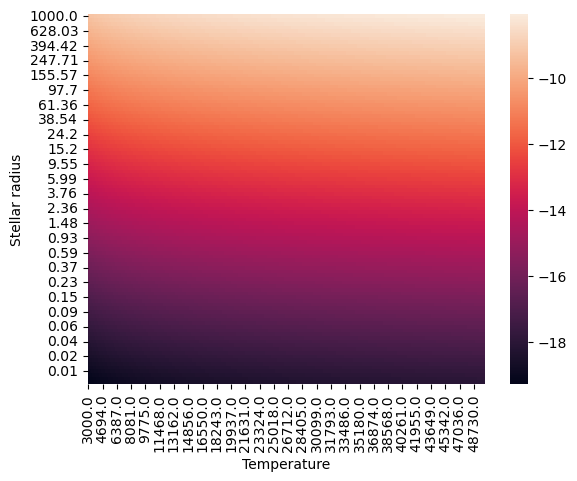

In [37]:
#ax=sns.heatmap(np.log10(stellar_constants))#[::-1])  # this term plots the y axis in the opposite direction
ax=sns.heatmap(np.log10(stellar_constants)[::-1])
#ax = sns.heatmap(glue, annot=True)
ax.set(xlabel="Temperature", ylabel="Stellar radius")

## Minimum frequency for different stars

Varying distances from Earth


In [38]:
def constant_for_min_frequency(constant_for_flux):
    return pow((pow(3e8, 2) * pow(10, -12.5))/constant_for_flux, 0.2)

In [39]:
constant_for_min_frequency(1e-15)

7777.651902073661

In [40]:
min_freq_constants = constant_for_min_frequency(stellar_constants)

In [41]:
min_freq_constants

# so now for the radii and temperatures and their corresponding stellar constants,
# we have calculated the constant for minimum feequency

3000.0        3047.0        3094.0        3141.0        3188.0   \
0.01     55945.443944  55771.605075  55600.957683  55433.395965  55268.819147   
0.01     53402.637174  53236.699550  53073.808345  52913.862566  52756.766018   
0.01     50975.404896  50817.009393  50661.521845  50508.845848  50358.889581   
0.01     48658.494071  48507.297889  48358.877489  48213.140852  48070.000329   
0.02     46446.890419  46302.566336  46160.891873  46021.779192  45885.144626   
...               ...           ...           ...           ...           ...   
628.03     673.864853    671.770958    669.715504    667.697217    665.714883   
705.48     643.236655    641.237931    639.275900    637.349348    635.457114   
792.48     614.000557    612.092677    610.219824    608.380836    606.574608   
890.22     586.093284    584.272120    582.484391    580.728988    579.004856   
1000.00    559.454439    557.716051    556.009577    554.333960    552.688191   

              3235.0        3282.0        3329.0        3376.0        3423.0   \
0.01     55107.131171  54948.240410  54792.059406  54638.504621  54487.496212   
0.01     52602.427010  52450.758080  52301.675743  52155.100260  52010.955416   
0.01     50211.565519  50066.790176  49924.483861  49784.570460  49646.977222   
0.01     47929.372373  47791.177292  47655.339019  47521.784898  47390.445485   
0.02     45750.908427  45618.994526  45489.330313  45361.846432  45236.476598   
...               ...           ...           ...           ...           ...   
628.03     663.767346    661.853501    659.972295    658.122722    656.303821   
705.48     633.598096    631.771238    629.975536    628.210029    626.473799   
792.48     604.800084    603.056260    601.342176    599.656914    597.999598   
890.22     577.310987    575.646422    574.010246    572.401581    570.819594   
1000.00    551.071312    549.482404    547.920594    546.385046    544.874962   

         ...       49577.0       49624.0       49671.0       49718.0  \
0.01     ...  31925.203084  31919.147272  31913.098347  31907.056293   
0.01     ...  30474.153332  30468.372767  30462.598775  30456.831341   
0.01     ...  29089.056031  29083.538202  29078.026646  29072.521352   
0.01     ...  27766.913540  27761.646505  27756.385458  27751.130387   
0.02     ...  26504.864466  26499.836825  26494.814901  26489.798682   
...      ...           ...           ...           ...           ...   
628.03   ...    384.540201    384.467259    384.394399    384.321623   
705.48   ...    367.062256    366.992629    366.923081    366.853612   
792.48   ...    350.378710    350.312247    350.245860    350.179549   
890.22   ...    334.453457    334.390015    334.326645    334.263348   
1000.00  ...    319.252031    319.191473    319.130983    319.070563   

              49765.0       49812.0       49859.0       49906.0       49953.0  \
0.01     31901.021096  31894.992742  31888.971217  31882.956506  31876.948595   
0.01     30451.070453  30445.316097  30439.568260  30433.826927  30428.092085   
0.01     29067.022305  29061.529493  29056.042904  29050.562523  29045.088339   
0.01     27745.881281  27740.638126  27735.400910  27730.169622  27724.944247   
0.02     26484.788155  26479.783310  26474.784134  26469.790615  26464.802742   
...               ...           ...           ...           ...           ...   
628.03     384.248928    384.176317    384.103787    384.031340    383.958974   
705.48     366.784222    366.714910    366.645677    366.576523    366.507446   
792.48     350.113313    350.047152    349.981065    349.915054    349.849117   
890.22     334.200122    334.136968    334.073886    334.010875    333.947935   
1000.00    319.010211    318.949927    318.889712    318.829565    318.769486   

              50000.0  
0.01     31870.947471  
0.01     30422.363721  
0.01     29039.620338  
0.01     27719.724775  
0.02     26459.820503  
...               ...  
628.03     383.886691  
705.48     366.438448  
792.48     349

[Text(0.5, 23.52222222222222, 'Temperature'),
 Text(50.722222222222214, 0.5, 'Stellar radius')]

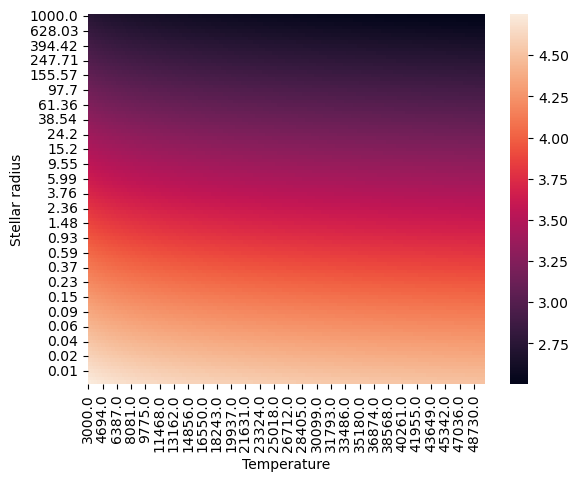

In [42]:
ax=sns.heatmap(np.log10(min_freq_constants)[::-1])
ax.set(xlabel="Temperature", ylabel="Stellar radius")

Text(0, 0.5, 'Minimum frequency')

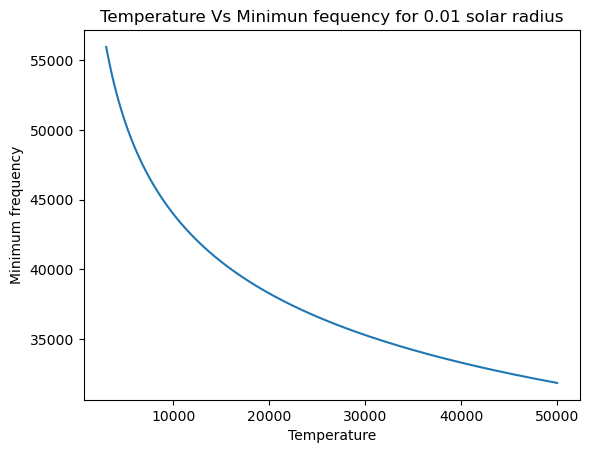

In [43]:
min_freq_constants.iloc[0] #This gives the minimum frequency for radius 0.01 solar radius
plt.plot(temperatures,min_freq_constants.iloc[0])
plt.title('Temperature Vs Minimun fequency for 0.01 solar radius')
plt.xlabel('Temperature')
plt.ylabel('Minimum frequency')

In [44]:
# As temperature increases, minimum frequency decreases for a constant solar radius

Text(0, 0.5, 'Minimum frequency')

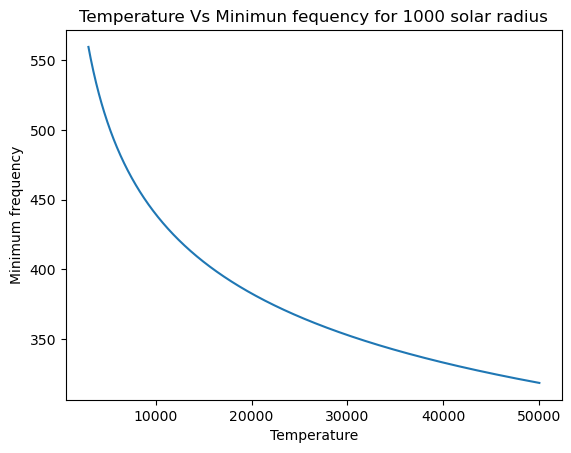

In [45]:
#min_freq_constants.iloc[99] #This gives the minimum frequency for radius 1000 solar radius
plt.plot(temperatures,min_freq_constants.iloc[99])
plt.title('Temperature Vs Minimun fequency for 1000 solar radius')
plt.xlabel('Temperature')
plt.ylabel('Minimum frequency')

# Minimum frequencies detectable at Earth's surface
The radio window for Earth puts a lower limit of 15 MHz ($1.5 \times 10^7$) and an upper limit of 1 THz ($1 \times 10^{12}$) for the frequency that can pass through Earth's atmosphere and reach detectors on the surface.


### 10000 m2 detector

Current capabilities

/tmp/ipykernel_48228/2362465018.py:7: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2, ax3, ax4, ax5)


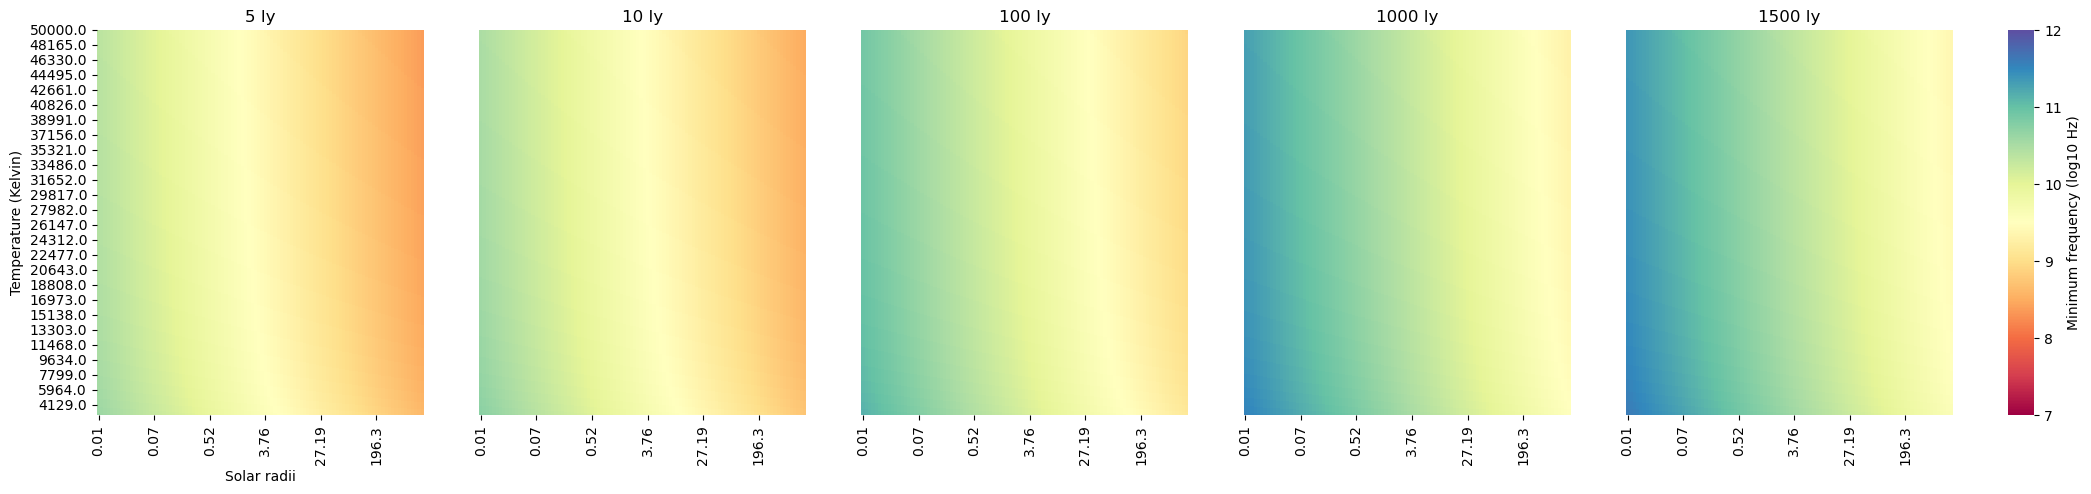

In [46]:
diameter_detector=100
freq_min = 7    # earth's radio window lower limit of 15 MHz (1.5×10^7) and an upper limit of 1 THz (1×10^12) 
freq_max = 12

fig, (ax1, ax2, ax3, ax4, ax5, axcb) = plt.subplots(1, 6, 
                                               gridspec_kw={'width_ratios':[1,1,1,1,1,0.08]})
ax1.get_shared_y_axes().join(ax2, ax3, ax4, ax5)



#frequency_minimum(light_years_to_star, diameter_detector, constant=10000.0) from Cocconi Morrison
#Compute the minimum frequency for a SETI signal to be distinguished above background radiation.
        
#Accounts for radiation from star and radiation from the galaxy (Cocconi & Morrison 1959).
        
#Args:
#light_years_to_star: distance to star in light years
#diameter_detector: diameter of the detector (m)

## 5 light years
g0 = sns.heatmap(np.log10(frequency_minimum(light_years_to_star=5,
                                            diameter_detector=diameter_detector,
                                            constant=min_freq_constants)).T[::-1],
                 ax=ax1, vmin=freq_min, vmax=freq_max, cbar=False, cmap="Spectral")
g0.set_title('5 ly')
g0.set_ylabel('Temperature (Kelvin)')
g0.set_xlabel('Solar radii')



## 10 light years
g1 = sns.heatmap(np.log10(frequency_minimum(light_years_to_star=10,
                                            diameter_detector=diameter_detector,
                                            constant=min_freq_constants)).T[::-1],
                 ax=ax2, vmin=freq_min, vmax=freq_max, cbar=False, cmap="Spectral")
g1.set_title('10 ly')
g1.set_yticks([])





## 100 light years
g2 = sns.heatmap(np.log10(frequency_minimum(light_years_to_star=100,
                                            diameter_detector=diameter_detector,
                                            constant=min_freq_constants)).T[::-1],
                 ax=ax3, vmin=freq_min, vmax=freq_max, cbar_ax=axcb, cmap="Spectral")
g2.set_title('100 ly')
g2.set_yticks([])




## 1000 light years
g3 = sns.heatmap(np.log10(frequency_minimum(light_years_to_star=1000,
                                            diameter_detector=diameter_detector,
                                            constant=min_freq_constants)).T[::-1],
                 ax=ax4, vmin=freq_min, vmax=freq_max, cbar_ax=axcb, cmap="Spectral",
                 cbar_kws={'label': 'Minimum frequency (log10 Hz)'})
g3.set_title('1000 ly')
g3.set_yticks([])




## 1500 light years
g4 = sns.heatmap(np.log10(frequency_minimum(light_years_to_star=1500,
                                            diameter_detector=diameter_detector,
                                            constant=min_freq_constants)).T[::-1],
                 ax=ax5, vmin=freq_min, vmax=freq_max, cbar_ax=axcb, cmap="Spectral",
                 cbar_kws={'label': 'Minimum frequency (log10 Hz)'})
g4.set_title('1500 ly')
g4.set_yticks([])

fig.set_figheight(5)
fig.set_figwidth(25)
plt.show()

### 1 km2 detector
Near future capabilities (SKA)

/tmp/ipykernel_48228/948968375.py:7: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2, ax3, ax4, ax5)


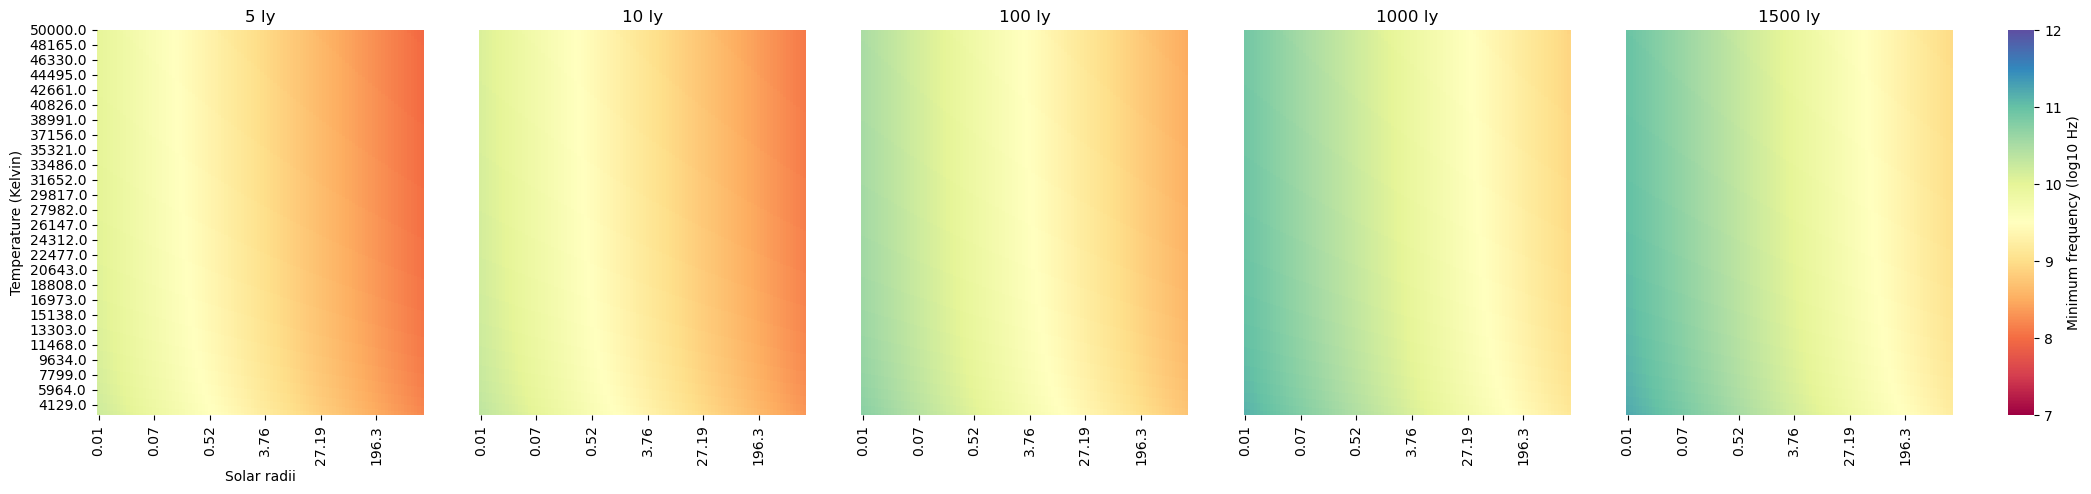

In [47]:
diameter_detector=1000
freq_min = 7
freq_max = 12

fig, (ax1, ax2, ax3, ax4, ax5, axcb) = plt.subplots(1, 6, 
                                               gridspec_kw={'width_ratios':[1,1,1,1,1,0.08]})
ax1.get_shared_y_axes().join(ax2, ax3, ax4, ax5)


## 5 light years
g0 = sns.heatmap(np.log10(frequency_minimum(light_years_to_star=5,
                                            diameter_detector=diameter_detector,
                                            constant=min_freq_constants)).T[::-1],
                 ax=ax1, vmin=freq_min, vmax=freq_max, cbar=False, cmap="Spectral")
g0.set_title('5 ly')
g0.set_ylabel('Temperature (Kelvin)')
g0.set_xlabel('Solar radii')

## 10 light years
g1 = sns.heatmap(np.log10(frequency_minimum(light_years_to_star=10,
                                            diameter_detector=diameter_detector,
                                            constant=min_freq_constants)).T[::-1],
                 ax=ax2, vmin=freq_min, vmax=freq_max, cbar=False, cmap="Spectral")
g1.set_title('10 ly')
g1.set_yticks([])

## 100 light years
g2 = sns.heatmap(np.log10(frequency_minimum(light_years_to_star=100,
                                            diameter_detector=diameter_detector,
                                            constant=min_freq_constants)).T[::-1],
                 ax=ax3, vmin=freq_min, vmax=freq_max, cbar_ax=axcb, cmap="Spectral")
g2.set_title('100 ly')
g2.set_yticks([])

## 1000 light years
g3 = sns.heatmap(np.log10(frequency_minimum(light_years_to_star=1000,
                                            diameter_detector=diameter_detector,
                                            constant=min_freq_constants)).T[::-1],
                 ax=ax4, vmin=freq_min, vmax=freq_max, cbar_ax=axcb, cmap="Spectral",
                 cbar_kws={'label': 'Minimum frequency (log10 Hz)'})
g3.set_title('1000 ly')
g3.set_yticks([])


## 1500 light years
g4 = sns.heatmap(np.log10(frequency_minimum(light_years_to_star=1500,
                                            diameter_detector=diameter_detector,
                                            constant=min_freq_constants)).T[::-1],
                 ax=ax5, vmin=freq_min, vmax=freq_max, cbar_ax=axcb, cmap="Spectral",
                 cbar_kws={'label': 'Minimum frequency (log10 Hz)'})
g4.set_title('1500 ly')
g4.set_yticks([])

fig.set_figheight(5)
fig.set_figwidth(25)
plt.show()

## Individual stars of interest

### Tabby's star


Minimum frequency for Tabby's star with 100m diameter detector = 10.65
Minimum frequency for Tabby's star with 1000m diameter detector = 10.25


[]

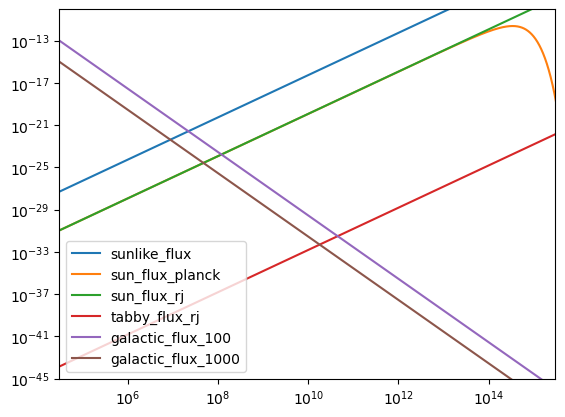

In [48]:
tabby_distance = 1447
tabby_temp = 6750
tabby_radius = 1.58

tabby_min_freq = np.log10(frequency_minimum(light_years_to_star=tabby_distance,
                          diameter_detector=100,
                          constant=constant_for_min_frequency(constant_for_flux_calc(tabby_radius, tabby_temp) 
                                                              * quiet_sun_factor)))

print(f"Minimum frequency for Tabby's star with 100m diameter detector = {round(tabby_min_freq, 2)}")


tabby_min_freq_1 = np.log10(frequency_minimum(light_years_to_star=tabby_distance,
                          diameter_detector=1000,
                          constant=constant_for_min_frequency(constant_for_flux_calc(tabby_radius, tabby_temp) 
                                                              * quiet_sun_factor)))

print(f"Minimum frequency for Tabby's star with 1000m diameter detector = {round(tabby_min_freq_1, 2)}")


sun_df["tabby_flux_rj"] = [flux_from_luminosity(monochromatic_luminosity_rayleigh_jeans(freq, tabby_temp, tabby_radius * SUN_RADIUS),
                                                light_years_to_metres(tabby_distance)) * quiet_sun_factor
                           for freq in frequencies]

sun_df[["sunlike_flux", "sun_flux_planck",
        "sun_flux_rj",
        "tabby_flux_rj",
        "galactic_flux_100",
        "galactic_flux_1000" ]][1e-2:1e18].plot(use_index=True, logx=True, logy=True, ylim=(1e-45, 1e-10), xlim=(3e4, 3e15))
plt.plot()

# Checking the dependence of minimum frequency for a large hot star. 

In [49]:
distance = 5
temp = 50000
radius = 196

min_freq = np.log10(frequency_minimum(light_years_to_star=distance,
                          diameter_detector=1000,
                          constant=constant_for_min_frequency(constant_for_flux_calc(radius, temp) 
                                                              * quiet_sun_factor)))
freq=10**round(min_freq, 2)

print(f"Minimum frequency for this star with 1000m diameter detector =",freq)

Minimum frequency for this star with 1000m diameter detector = 181970085.86099824


In [50]:
distance = 1500
temp = 50000
radius = 196

min_freq = np.log10(frequency_minimum(light_years_to_star=distance,
                          diameter_detector=1000,
                          constant=constant_for_min_frequency(constant_for_flux_calc(radius, temp) 
                                                              * quiet_sun_factor)))
freq1=10**round(min_freq, 2)

print(f"Minimum frequency for this star with 1000m diameter detector =",freq1)

Minimum frequency for this star with 1000m diameter detector = 1778279410.0389228


In [51]:
temp = 50000
radius = 196
distance=np.linspace(5,1500,1000)
min_freq2 = np.log10(frequency_minimum(light_years_to_star=distance,
                          diameter_detector=1000,
                          constant=constant_for_min_frequency(constant_for_flux_calc(radius, temp) 
                                                              * quiet_sun_factor)))


Text(0.5, 0, 'Minimum frequency')

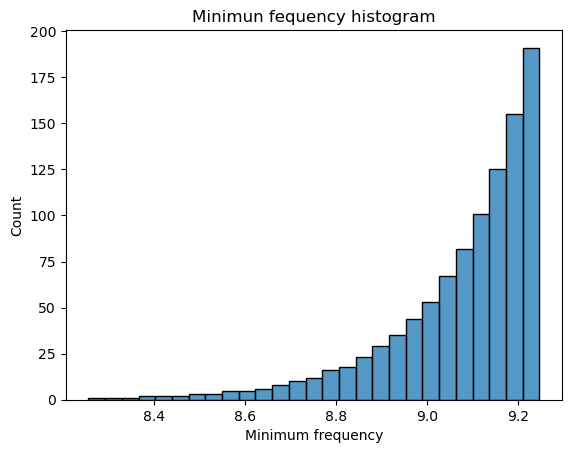

In [52]:
sns.histplot(min_freq2)
plt.title('Minimun fequency histogram')
plt.xlabel('Minimum frequency')

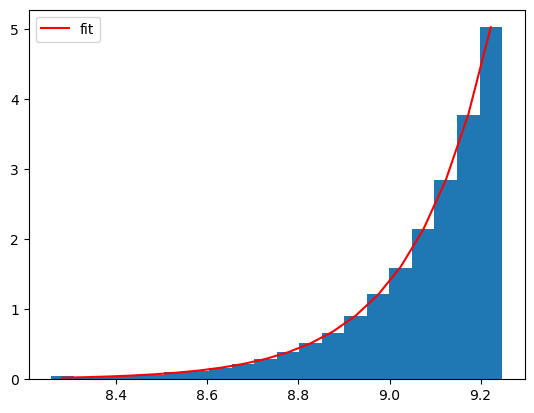

In [53]:
from scipy.optimize import curve_fit


# Define the function to fit (an exponential)
def exponential(x,a, b):
    return  a*np.exp(-b * x)

# Compute the histogram of the data
hist, bins = np.histogram(min_freq2, bins=20, density=True)

# Compute the center of each bin
bin_centers = (bins[1:] + bins[:-1]) / 2

# Fit the exponential to the histogram
popt, pcov = curve_fit(exponential, bin_centers, hist,maxfev=1000)

# Plot the histogram and the fitted curve
plt.hist(min_freq2, bins=20, density=True)
plt.plot(bin_centers, exponential(bin_centers, *popt), 'r-', label='fit')
plt.legend()
plt.show()


In [54]:
print("Optimal parameters:")
print("a =", popt[0])
print("b =", popt[1])

Optimal parameters:
a = 4.193673379837917e-23
b = -5.7620352078341295


In [55]:
a, b = popt
print(f"Exponential fit: y = {4.19e-23} * exp(-{b:.2f} * x)")

Exponential fit: y = 4.19e-23 * exp(--5.76 * x)


Text(0, 0.5, 'Residuals')

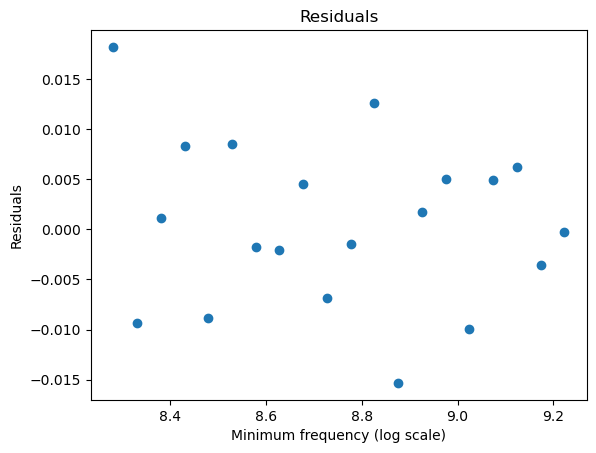

In [56]:
#Calculate residuals

residuals = hist - exponential(bin_centers, *popt)
plt.plot(bin_centers, residuals, 'o')
plt.title('Residuals')
plt.xlabel('Minimum frequency (log scale)')
plt.ylabel('Residuals')

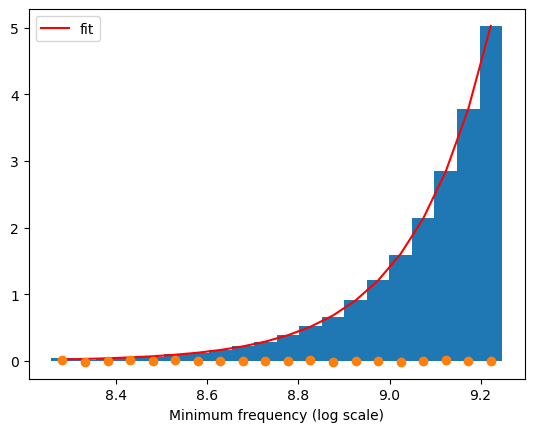

In [57]:
#Plot the histogram and the residuals

plt.hist(min_freq2, bins=20, density=True)
plt.plot(bin_centers, exponential(bin_centers, *popt), 'r-', label='fit')
plt.plot(bin_centers, residuals, 'o')
plt.xlabel('Minimum frequency (log scale)')
plt.legend()

# Checking the dependence of minimun frequency on distance for a small cool star

In [58]:
distance = 5
temp = 4129
radius = 0.01

min_freq = np.log10(frequency_minimum(light_years_to_star=distance,
                          diameter_detector=1000,
                          constant=constant_for_min_frequency(constant_for_flux_calc(radius, temp) 
                                                              * quiet_sun_factor)))
freq=10**round(min_freq, 2)

print(f"Minimum frequency for this star with 1000m diameter detector =",freq)

Minimum frequency for this star with 1000m diameter detector = 15488166189.124796


In [59]:
distance = 1500
temp = 4129
radius = 0.01

min_freq = np.log10(frequency_minimum(light_years_to_star=distance,
                          diameter_detector=1000,
                          constant=constant_for_min_frequency(constant_for_flux_calc(radius, temp) 
                                                              * quiet_sun_factor)))
freq1=10**round(min_freq, 2)

print(f"Minimum frequency for this star with 1000m diameter detector =",freq1)

Minimum frequency for this star with 1000m diameter detector = 151356124843.62073


In [60]:
temp = 4129
radius = 0.01
distance=np.linspace(5,1500,1000)
min_freq2 = np.log10(frequency_minimum(light_years_to_star=distance,
                          diameter_detector=1000,
                          constant=constant_for_min_frequency(constant_for_flux_calc(radius, temp) 
                                                              * quiet_sun_factor)))


Text(0.5, 0, 'Minimum frequency (log scale)')

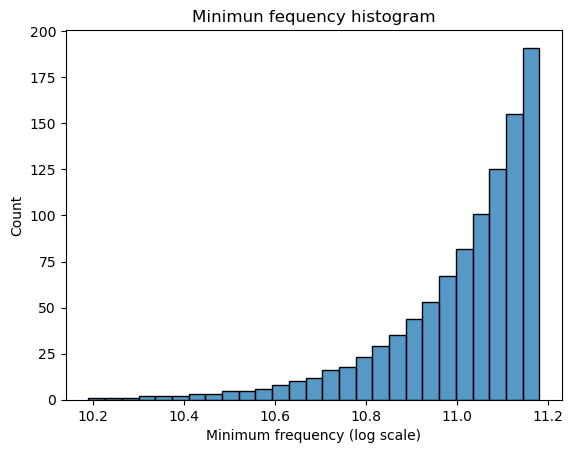

In [61]:
sns.histplot(min_freq2)
plt.title('Minimun fequency histogram')
plt.xlabel('Minimum frequency (log scale)')

/tmp/ipykernel_48228/654301807.py:6: RuntimeWarning: overflow encountered in exp
  return  a*np.exp(-b * x)


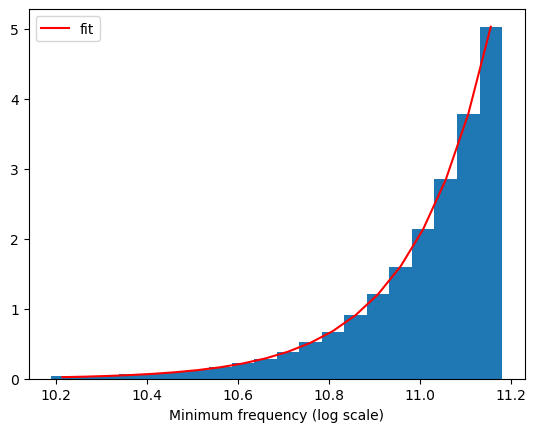

In [62]:
from scipy.optimize import curve_fit


# Define the function to fit (an exponential)
def exponential(x,a, b):
    return  a*np.exp(-b * x)

# Compute the histogram of the data
hist, bins = np.histogram(min_freq2, bins=20, density=True)

# Compute the center of each bin
bin_centers = (bins[1:] + bins[:-1]) / 2

# Fit the exponential to the histogram
popt, pcov = curve_fit(exponential, bin_centers, hist,maxfev=10000)

# Plot the histogram and the fitted curve
plt.hist(min_freq2, bins=20, density=True)
plt.plot(bin_centers, exponential(bin_centers, *popt), 'r-', label='fit')
plt.xlabel('Minimum frequency (log scale)')
plt.legend()
plt.show()


In [63]:
print("Optimal parameters:")
print("a =", popt[0])
print("b =", popt[1])

a, b = popt
print(f"Exponential fit: y = {6.08e-28} * exp(-{b:.2f} * x)")

Optimal parameters:
a = 6.082704056343538e-28
b = -5.762035200150997
Exponential fit: y = 6.08e-28 * exp(--5.76 * x)


Text(0, 0.5, 'Residuals')

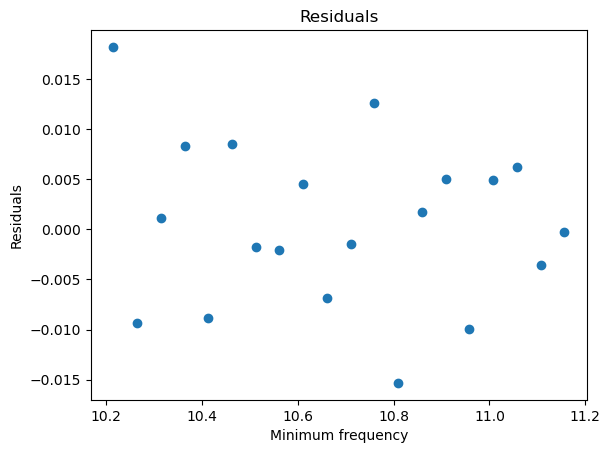

In [64]:
#Calculate residuals

residuals = hist - exponential(bin_centers, *popt)
plt.plot(bin_centers, residuals, 'o')
plt.title('Residuals')
plt.xlabel('Minimum frequency')
plt.ylabel('Residuals')

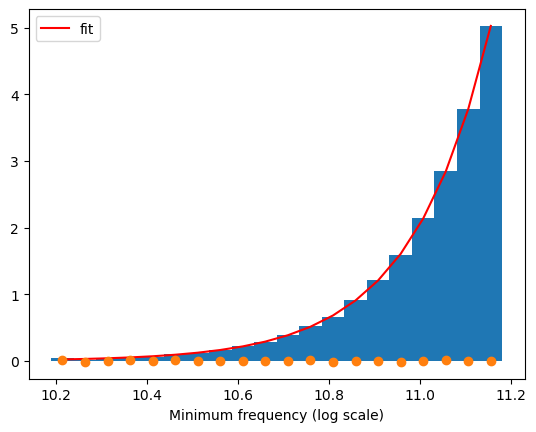

In [65]:
#Plot the histogram and the residuals

plt.hist(min_freq2, bins=20, density=True)
plt.plot(bin_centers, exponential(bin_centers, *popt), 'r-', label='fit')
plt.plot(bin_centers, residuals, 'o')
plt.xlabel('Minimum frequency (log scale)')
plt.legend()

## Summary

The minimum frequency required for us to detect a message above background radiation is inversely proportional to the radius and temperature of the host star:

$${f_{min}} \propto {{1}\over{r^{0.4}T^{0.2}}} $$

A message sent from a planet orbiting a smaller star will need a higher minimum frequency. 

The frequency increases further with increasing distance from Earth and decreases with the size of our detector. 

All minimum frequencies fall within the window that can pass through Earth's atmosphere.